In [1]:
# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load and Prepare the wine Dataset
columns = ['target', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, names=columns)

In [3]:
# Map target classes to numerical values
df['target'] = df['target'].astype('category').cat.codes

In [4]:
# Split data into features and labels
X = df.iloc[:, :-1].values
y = df['target'].values

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [6]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [8]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [9]:
# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 3) # Output layer for 3 classes
    )
  def forward(self, x):
    return self.model(x)

In [10]:
# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss:{running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss:0.1190
Epoch 1/20, Loss:0.2439
Epoch 1/20, Loss:0.3607
Epoch 1/20, Loss:0.4814
Epoch 1/20, Loss:0.6031
Epoch 1/20, Loss:0.7227
Epoch 1/20, Loss:0.8436
Epoch 1/20, Loss:0.9635
Epoch 1/20, Loss:1.0872
Epoch 2/20, Loss:0.1168
Epoch 2/20, Loss:0.2352
Epoch 2/20, Loss:0.3537
Epoch 2/20, Loss:0.4713
Epoch 2/20, Loss:0.5909
Epoch 2/20, Loss:0.7074
Epoch 2/20, Loss:0.8281
Epoch 2/20, Loss:0.9484
Epoch 2/20, Loss:1.0690
Epoch 3/20, Loss:0.1181
Epoch 3/20, Loss:0.2340
Epoch 3/20, Loss:0.3516
Epoch 3/20, Loss:0.4696
Epoch 3/20, Loss:0.5836
Epoch 3/20, Loss:0.7015
Epoch 3/20, Loss:0.8154
Epoch 3/20, Loss:0.9314
Epoch 3/20, Loss:1.0463
Epoch 4/20, Loss:0.1135
Epoch 4/20, Loss:0.2286
Epoch 4/20, Loss:0.3429
Epoch 4/20, Loss:0.4538
Epoch 4/20, Loss:0.5661
Epoch 4/20, Loss:0.6776
Epoch 4/20, Loss:0.7886
Epoch 4/20, Loss:0.9018
Epoch 4/20, Loss:1.0132
Epoch 5/20, Loss:0.1094
Epoch 5/20, Loss:0.2168
Epoch 5/20, Loss:0.3266
Epoch 5/20, Loss:0.4365
Epoch 5/20, Loss:0.5419
Epoch 5/20, Loss

In [12]:
# Step 5: Validate the Model
model.eval()
correct = 0
total = 0
with torch.no_grad():
  for X_batch, y_batch in test_loader:
    outputs = model(X_batch)
    _, predicted = torch.max(outputs, 1)
    total += y_batch.size(0)
    correct += (predicted == y_batch).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


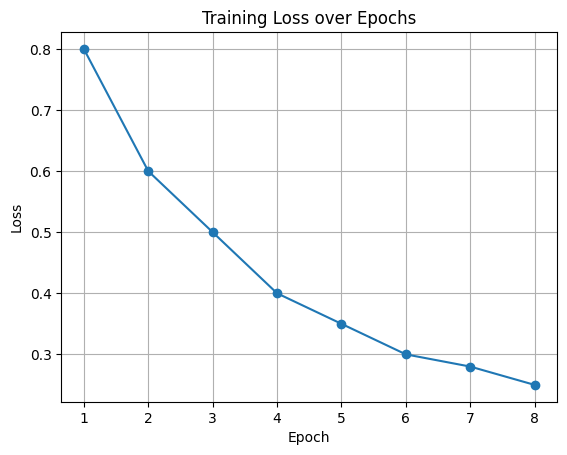

In [13]:
# Step 6: Visualize Training Loss and Data Distribution
# Plotting training loss (example values, replace with real loss values if collected)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

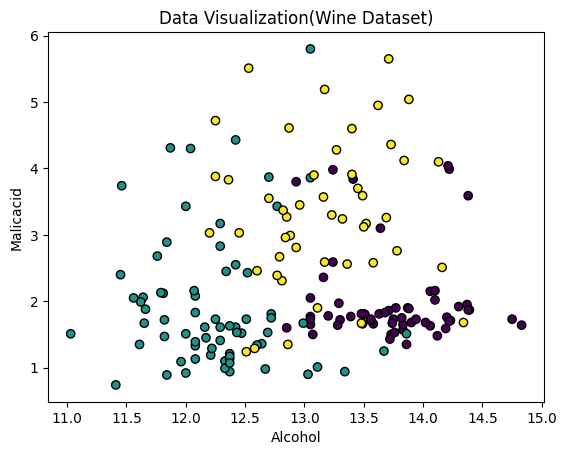

In [15]:
# Visualize data distribution
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.title('Data Visualization(Wine Dataset)')
plt.show()